In [1]:
from __future__ import print_function
import torch
print(torch.__version__)
import torchvision
print(torchvision.__version__)

# import some common libraries
import numpy as np
import cv2
import random
import os

import numpy as np
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

1.6.0
0.7.0
CUDA is available!  Training on GPU ...


In [2]:
import tensorflow as tf
#print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.1.0
Keras Version:  2.2.4-tf
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
!pwd

/home/kaikai/Documents/MyDetector


In [6]:
!unzip utils.zip

Archive:  utils.zip
   creating: utils/
   creating: utils/.ipynb_checkpoints/
 extracting: utils/.ipynb_checkpoints/__init__-checkpoint.py  
  inflating: utils/.ipynb_checkpoints/plotresults-checkpoint.py  
 extracting: utils/__init__.py       
  inflating: utils/plotresults.py    
   creating: utils/__pycache__/
  inflating: utils/__pycache__/__init__.cpython-36.pyc  
  inflating: utils/__pycache__/plotresults.cpython-36.pyc  


In [7]:
!unzip MyDetector.zip

Archive:  MyDetector.zip
   creating: MyDetector/
  inflating: MyDetector/Detectron2Detector.py  
   creating: MyDetector/.ipynb_checkpoints/
  inflating: MyDetector/.ipynb_checkpoints/Detectron2Detector-checkpoint.py  
 extracting: MyDetector/.ipynb_checkpoints/__init__-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/Detectron2Evaluator-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/TorchVisionDetector-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/engine-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/coco_utils-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/TorchVisionEvaluator-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/WaymoDataset-checkpoint.py  
  inflating: MyDetector/.ipynb_checkpoints/utils-checkpoint.py  
 extracting: MyDetector/__init__.py  
   creating: MyDetector/__pycache__/
  inflating: MyDetector/__pycache__/__init__.cpython-36.pyc  
  inflating: MyDetector/__pycache__/Detectron2Detector.cpython-3

# Install Detectron2

In [9]:
!pip install pyyaml==5.1 'pycocotools>=2.0.1'
#import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=279469 sha256=1990645ecc65a30d8a1e3e7c08f2cf03d4750e97d8c6a6e1c06c7cb050aee4ab
  Stored in directory: /home/kaikai/.cache/pip/wheels/bc/cf/1b/e95c99c5f9d1648be3f500ca55e7ce55f24818b0f48336adaf
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

object-detection 0.1 requires scipy, which is not installed.
1.6.0 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions

In [17]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 7825 (delta 10), reused 14 (delta 5), pack-reused 7775
Receiving objects: 100% (7825/7825), 3.50 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (5562/5562), done.


In [2]:
#from Detectron2Detector import MyDetectron2Detector
import importlib
from MyDetector import Detectron2Detector
importlib.reload(Detectron2Detector)
#https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart

<module 'MyDetector.Detectron2Detector' from '/home/kaikai/Documents/MyDetector/MyDetector/Detectron2Detector.py'>

# UAV single image demo via detectron2

./traffic.jpg
Image width:  1024
Image height:  576
time: 0.193s, fps: 5.181, detection numbers: 241


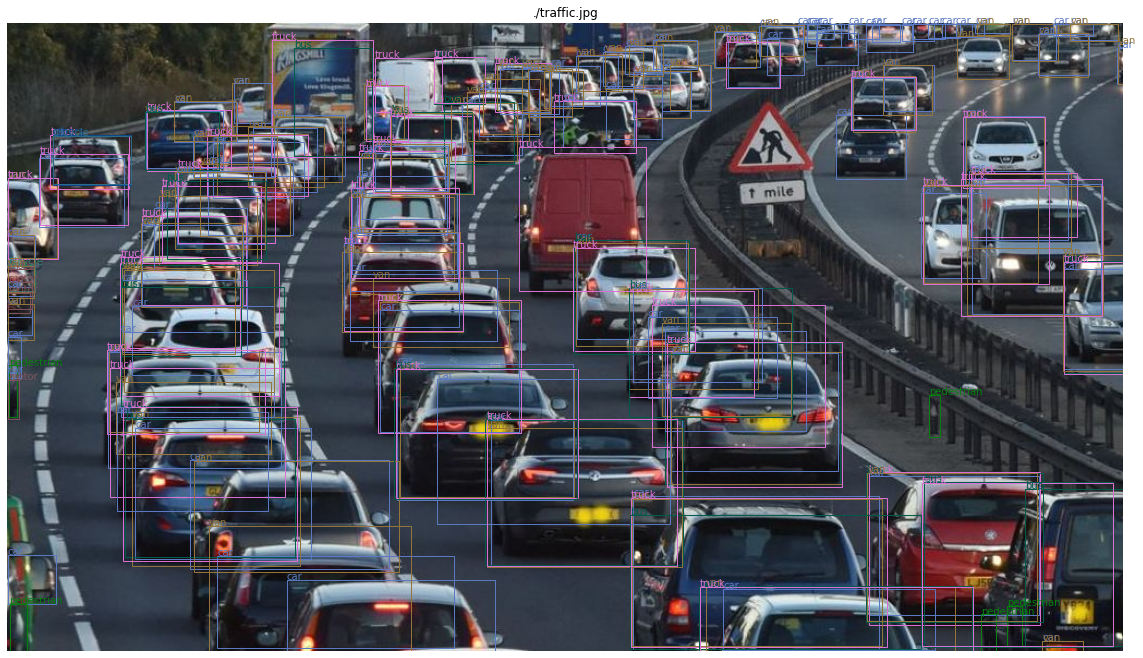

In [16]:
#UAV single image demo
from utils.plotresults import show_image_bbxyxy
%matplotlib inline
import os
import time

import argparse
def parse_detectorargs():
    #args.showfig
    #args.modelname
    #args.modelbasefolder
    #args.modelfilename
    parser = argparse.ArgumentParser()
    parser.add_argument("--modelname", type=str, default="faster_rcnn_X_101_32x8d_FPN_3x")
    #parser.add_argument("--max_dist", type=float, default=0.3)
    #parser.add_argument("--display_height", type=int, default=600)
    parser.add_argument("--modelbasefolder", type=str, default="/home/010796032/PytorchWork/output_uav")
    parser.add_argument("--modelfilename", type=str, default="model_0299999.pth") #model_0119999
    parser.add_argument("--showfig", type=str, default="True")
    return parser.parse_args()

#Simulate the args parse in Jupyternotebook
class detectorargs:
    modelname = 'faster_rcnn_X_101_32x8d_FPN_3x'
    modelbasefolder = './ModelOutput'
    modelfilename='uav_fasterrcnnx101_detectron2_final.pth'
    showfig='True'
    FULL_LABEL_CLASSES=['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']

def detectoneimage(imgpath, mydetector):
    start = time.time()
    ori_im = cv2.imread(imgpath)
    imageshape=ori_im.shape
    im_width=imageshape[1]#2720#800
    im_height=imageshape[0]#1530#600
    print("Image width: ", im_width)
    print("Image height: ", im_height)

    im = cv2.cvtColor(ori_im, cv2.COLOR_BGR2RGB)
    bbox_xyxy, cls_ids, cls_conf = mydetector.detect(im)

    end = time.time()
    show_image_bbxyxy(im, bbox_xyxy, cls_ids, imgpath, mydetector.FULL_LABEL_CLASSES, 'testimg.pdf')
    #cv2.imwrite('resulttest.jpg', imresult) 
    print("time: {:.03f}s, fps: {:.03f}, detection numbers: {}".format(end - start, 1 / (end - start), len(bbox_xyxy)))

import importlib
from MyDetector import Detectron2Detector
importlib.reload(Detectron2Detector)

mydetector = Detectron2Detector.MyDetectron2Detector(detectorargs)
imgpath=os.path.join('.', "traffic.jpg")
#imgpath=os.path.join('/data/cmpe295-liu/UAVision/VisDrone2019-MOT-val/sequences/uav0000137_00458_v','0000002.jpg')
print(imgpath)
detectoneimage(imgpath,mydetector)

# Waymo Demo via Detectron2

./traffic.jpg
File exists:True
Image width:  1024
Image height:  576
time: 0.220s, fps: 4.545, detection numbers: 98


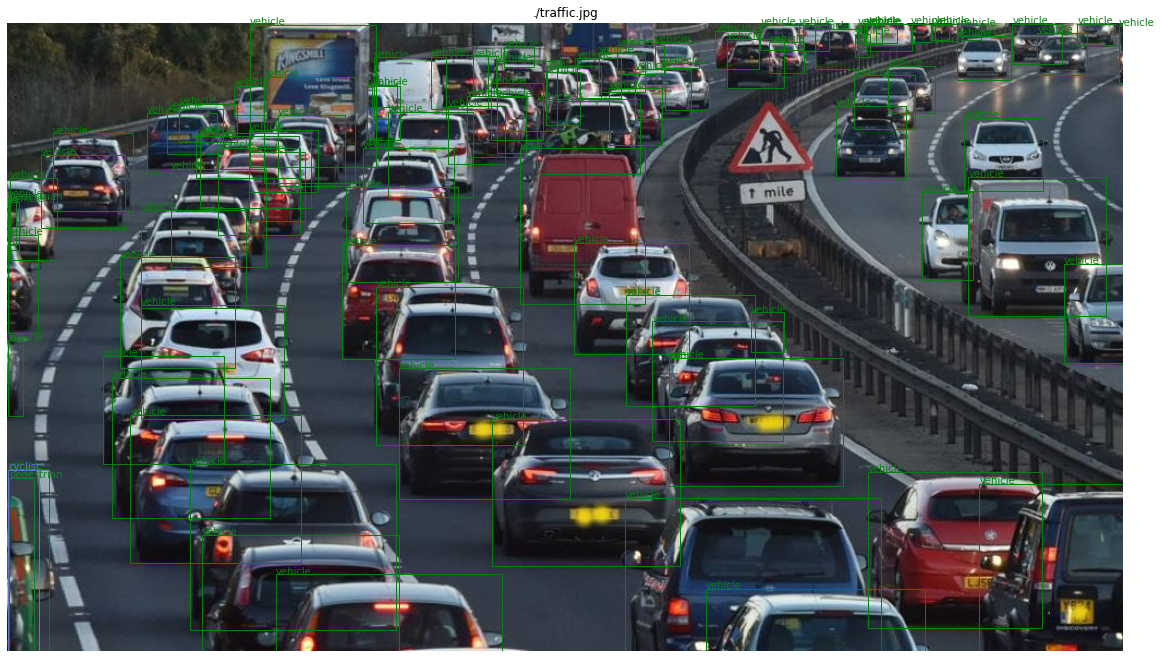

In [11]:
#UAV single image demo
from utils.plotresults import show_image_bbxyxy
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import os
import time
import os.path
from os import path
import cv2

import argparse
def parse_detectorargs():
    #args.showfig
    #args.modelname
    #args.modelbasefolder
    #args.modelfilename
    parser = argparse.ArgumentParser()
    parser.add_argument("--modelname", type=str, default="faster_rcnn_X_101_32x8d_FPN_3x")
    #parser.add_argument("--max_dist", type=float, default=0.3)
    #parser.add_argument("--display_height", type=int, default=600)
    parser.add_argument("--modelbasefolder", type=str, default="/home/010796032/PytorchWork/output")
    parser.add_argument("--modelfilename", type=str, default="model_final.pth")
    parser.add_argument("--showfig", type=str, default="True")
    return parser.parse_args()

#Simulate the args parse in Jupyternotebook
class detectorargs:
    modelname = 'faster_rcnn_X_101_32x8d_FPN_3x'
    modelbasefolder = './ModelOutput'
    modelfilename='waymo_fasterrcnnx101_detectron2model_final.pth' #
    showfig='True'
    FULL_LABEL_CLASSES=['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']

def detectoneimage(imgpath, mydetector):
    start = time.time()
    print ("File exists:"+str(path.exists(imgpath)))
    ori_im = cv2.imread(imgpath)
    imageshape=ori_im.shape
    im_width=imageshape[1]#2720#800
    im_height=imageshape[0]#1530#600
    print("Image width: ", im_width)
    print("Image height: ", im_height)

    im = cv2.cvtColor(ori_im, cv2.COLOR_BGR2RGB)
    bbox_xyxy, cls_ids, cls_conf = mydetector.detect(im)

    end = time.time()
    show_image_bbxyxy(im, bbox_xyxy, cls_ids, imgpath, mydetector.FULL_LABEL_CLASSES, 'testimg.pdf')
    #cv2.imwrite('resulttest.jpg', imresult) 
    print("time: {:.03f}s, fps: {:.03f}, detection numbers: {}".format(end - start, 1 / (end - start), len(bbox_xyxy)))

import importlib
from MyDetector import Detectron2Detector
importlib.reload(Detectron2Detector)

##Unknown:0, Vehicles: 1, Pedestrians: 2, Cyclists: 3, Signs (removed)
INSTANCE_CATEGORY_NAMES = ['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']
#INSTANCE_CATEGORY_NAMES = ['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']

mydetector = Detectron2Detector.MyDetectron2Detector(detectorargs)
imgpath=os.path.join('.', "traffic.jpg")
print(imgpath)
detectoneimage(imgpath, mydetector)

In [21]:
!ls /mnt/DATA5T/WaymoDataset  

NewTFRecord	   training_0001.tar  validation_0000.tar
training_0000.tar  Validation0000     WaymoCOCO.zip


In [13]:
!ls -al /mnt/DATA5T/WaymoDataset/WaymoCOCO/Validation/validation_0000

total 532476
drwxr-xr-x  2 kaikai kaikai 118784 Sep 17 15:01 .
drwxr-xr-x 10 kaikai kaikai   4096 Sep 17 15:02 ..
-rw-r--r--  1 kaikai kaikai 477969 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688014970187_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 470109 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688015469787_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 472131 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688015969284_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 480547 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688016468528_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 517725 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688016967730_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 557076 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688017467153_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 620394 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1522688017966696_FRONT.jpg
-rw-r--r--  1 kaikai kaikai 611353 Sep 17 15:01 10203656353524179475_7625_000_7645_000_1

/mnt/DATA5T/WaymoDataset/WaymoCOCO/Validation/validation_0000/10203656353524179475_7625_000_7645_000_1522688014970187_FRONT.jpg
File exists:True
Image width:  1920
Image height:  1280
time: 0.230s, fps: 4.347, detection numbers: 115


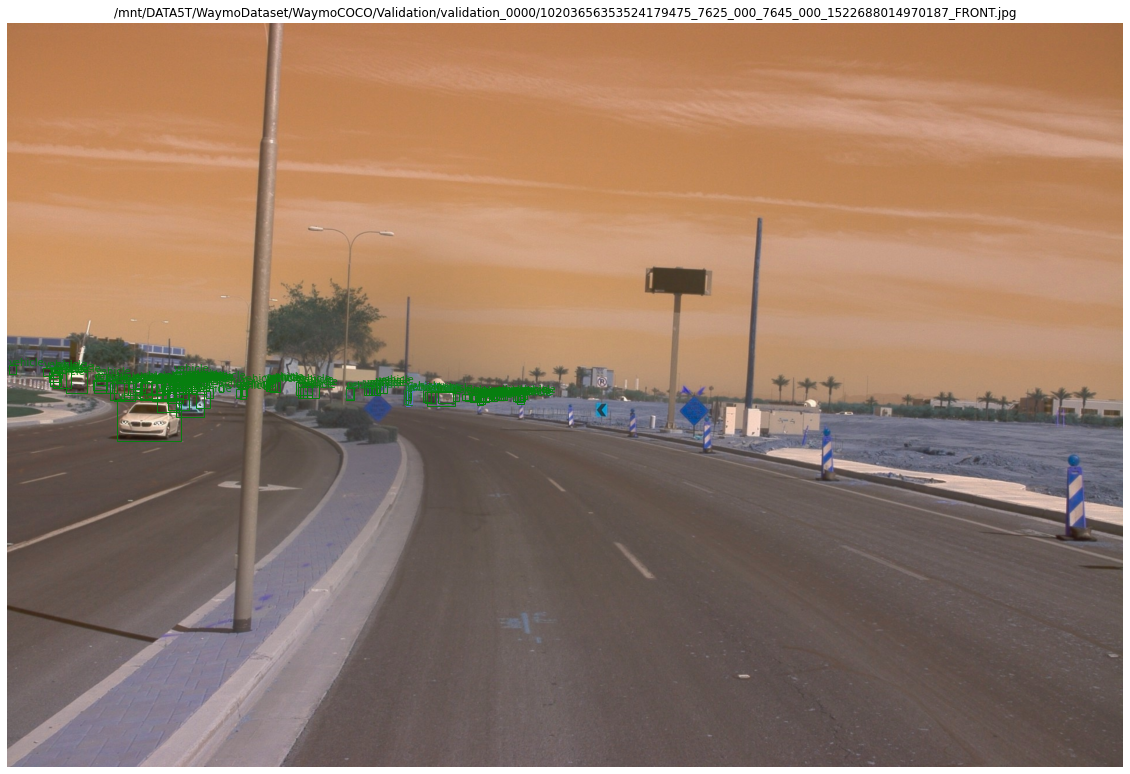

In [14]:
imgpath=os.path.join('/mnt/DATA5T/WaymoDataset/WaymoCOCO/Validation/validation_0000', "10203656353524179475_7625_000_7645_000_1522688014970187_FRONT.jpg")
print(imgpath)
detectoneimage(imgpath, mydetector)

In [39]:
!ls /mnt/DATA5T/WaymoDataset/Validation0000

LICENSE
segment-10448102132863604198_472_000_492_000_with_camera_labels.tfrecord
segment-10689101165701914459_2072_300_2092_300_with_camera_labels.tfrecord
segment-11037651371539287009_77_670_97_670_with_camera_labels.tfrecord
segment-1105338229944737854_1280_000_1300_000_with_camera_labels.tfrecord
segment-11660186733224028707_420_000_440_000_with_camera_labels.tfrecord
segment-13178092897340078601_5118_604_5138_604_with_camera_labels.tfrecord
segment-14127943473592757944_2068_000_2088_000_with_camera_labels.tfrecord
segment-14956919859981065721_1759_980_1779_980_with_camera_labels.tfrecord
segment-16213317953898915772_1597_170_1617_170_with_camera_labels.tfrecord
segment-16751706457322889693_4475_240_4495_240_with_camera_labels.tfrecord
segment-17344036177686610008_7852_160_7872_160_with_camera_labels.tfrecord
segment-17539775446039009812_440_000_460_000_with_camera_labels.tfrecord
segment-17612470202990834368_2800_000_2820_000_with_camera_labels.tfrecord
segment-2094681306939952000_

In [15]:
from MyDetector import Detectron2Evaluator
importlib.reload(Detectron2Evaluator)

class detectorargs:
    modelname = 'faster_rcnn_X_101_32x8d_FPN_3x'
    modelbasefolder = './ModelOutput'
    modelfilename='waymo_fasterrcnnx101_detectron2model_final.pth' #
    showfig='True'
    datasetname='mywaymo3'
    FULL_LABEL_CLASSES=['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']#['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']
    datasetpath="/mnt/DATA5T/WaymoDataset/WaymoCOCO" #"/data/cmpe295-liu/Waymo/WaymoCOCOsmall/"
    
myevaluator=Detectron2Evaluator.Detectron2COCOEvaluator(detectorargs)

['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_minival_100', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2014_minival_100', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco_2017_val_panoptic_stuffonly', 'coco_2017_val_panoptic', 'coco_2017_val_100_panoptic_separated', 'coco_2017_val_100_panoptic_stuffonly', 'coco_2017_val_100_panoptic', 'lvis_v1_train', 'lvis_v1_val', 'lvis_v1_test_dev', 'lvis_v1_test_challenge', 'lvis_v0.5_train', 'lvis_v0.5_val', 'lvis_v0.5_val_rand_100', 'lvis_v0.5_test', 'lvis_v0.5_train_cocofied', 'lvis_v0.5_val_cocofied', 'cityscapes_fine_in

In [16]:
myevaluator.evaluate()#('./output_waymo')

WARNING [10/25 17:16:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass tasks in directly
[10/25 17:16:56 d2.evaluation.coco_evaluation]: 'mywaymo3Validation' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[10/25 17:16:56 d2.data.datasets.coco]: Converting annotations of dataset 'mywaymo3Validation' to COCO format ...)
[10/25 17:16:57 d2.data.datasets.coco]: Loading /mnt/DATA5T/WaymoDataset/WaymoCOCO/Validation/annotations.json takes 1.01 seconds.
[10/25 17:16:57 d2.data.datasets.coco]: Loaded 8069 images in COCO format from /mnt/DATA5T/WaymoDataset/WaymoCOCO/Validation/annotations.json
[10/25 17:16:57 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/25 17:17:09 d2.data.datasets.coco]: Conversion finished, #images: 8069, #annotations: 178665
[10/25 17:17:09 d2.data.datasets.coco]: Caching COCO format annotations at './ModelOutput/mywaymo3Validation_

# Torchvision Waymo Demo

In [40]:
!pwd

/home/kaikai/Documents/MyDetector


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/kaikai/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



./traffic.jpg
Image width:  1024
Image height:  576
time: 0.087s, fps: 11.456, detection numbers: 100


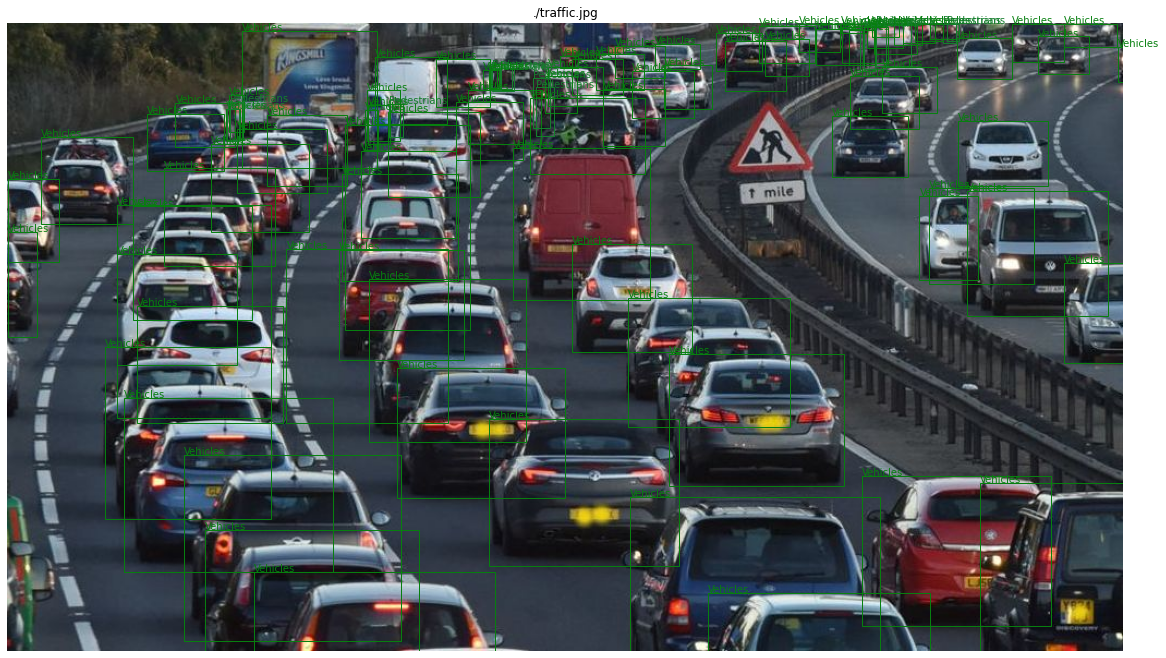

In [52]:
#UAV single image demo
from utils.plotresults import show_image_bbxyxy
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import os
import time

import argparse
def parse_detectorargs():
    #args.showfig
    #args.modelname
    #args.modelbasefolder
    #args.modelfilename
    parser = argparse.ArgumentParser()
    parser.add_argument("--modelname", type=str, default="fasterrcnn_resnet50_fpn")#not used here
    #model=load_previous_object_detection_model(num_classes,'./saved_models_py4/model_18.pth') #./saved_models_mac1/model_27.pth
    parser.add_argument("--modelbasefolder", type=str, default="/home/010796032/Waymo/saved_models_py4")
    parser.add_argument("--modelfilename", type=str, default="model_27.pth")
    parser.add_argument("--showfig", type=str, default="True")
    return parser.parse_args()

#Simulate the args parse in Jupyternotebook
class detectorargs:
    modelname = 'fasterrcnn_resnet50_fpn'#not used here
    modelbasefolder = './ModelOutput'
    modelfilename='waymo_fasterrcnn_resnet50_fpnmodel_27.pth'
    showfig='True'
    FULL_LABEL_CLASSES = [
    'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'
    ]
    #FULL_LABEL_CLASSES=['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']#['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']

def detectoneimage(imgpath, mydetector):
    start = time.time()
    ori_im = cv2.imread(imgpath)
    imageshape=ori_im.shape
    im_width=imageshape[1]#2720#800
    im_height=imageshape[0]#1530#600
    print("Image width: ", im_width)
    print("Image height: ", im_height)

    im = cv2.cvtColor(ori_im, cv2.COLOR_BGR2RGB)
    bbox_xyxy, cls_ids, cls_conf = mydetector.detect(im)

    end = time.time()
    show_image_bbxyxy(im, bbox_xyxy, cls_ids, imgpath, mydetector.FULL_LABEL_CLASSES, 'testimg.pdf')
    #cv2.imwrite('resulttest.jpg', imresult) 
    print("time: {:.03f}s, fps: {:.03f}, detection numbers: {}".format(end - start, 1 / (end - start), len(bbox_xyxy)))

import importlib
from MyDetector import TorchVisionDetector
importlib.reload(TorchVisionDetector)

##Unknown:0, Vehicles: 1, Pedestrians: 2, Cyclists: 3, Signs (removed)
#INSTANCE_CATEGORY_NAMES = ['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']
#INSTANCE_CATEGORY_NAMES = ['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']

mydetector = TorchVisionDetector.TorchVisionFasterRCNNDetector(detectorargs)
imgpath=os.path.join('.', "traffic.jpg")
print(imgpath)
detectoneimage(imgpath, mydetector)

In [51]:
!rm /home/kaikai/.cache/torch/hub/checkpoints/*.pth

/mnt/DATA5T/WaymoDataset//WaymoCOCO/Validation/validation_0000/10203656353524179475_7625_000_7645_000_1522688014970187_FRONT.jpg
Image width:  1920
Image height:  1280
time: 0.111s, fps: 8.992, detection numbers: 73


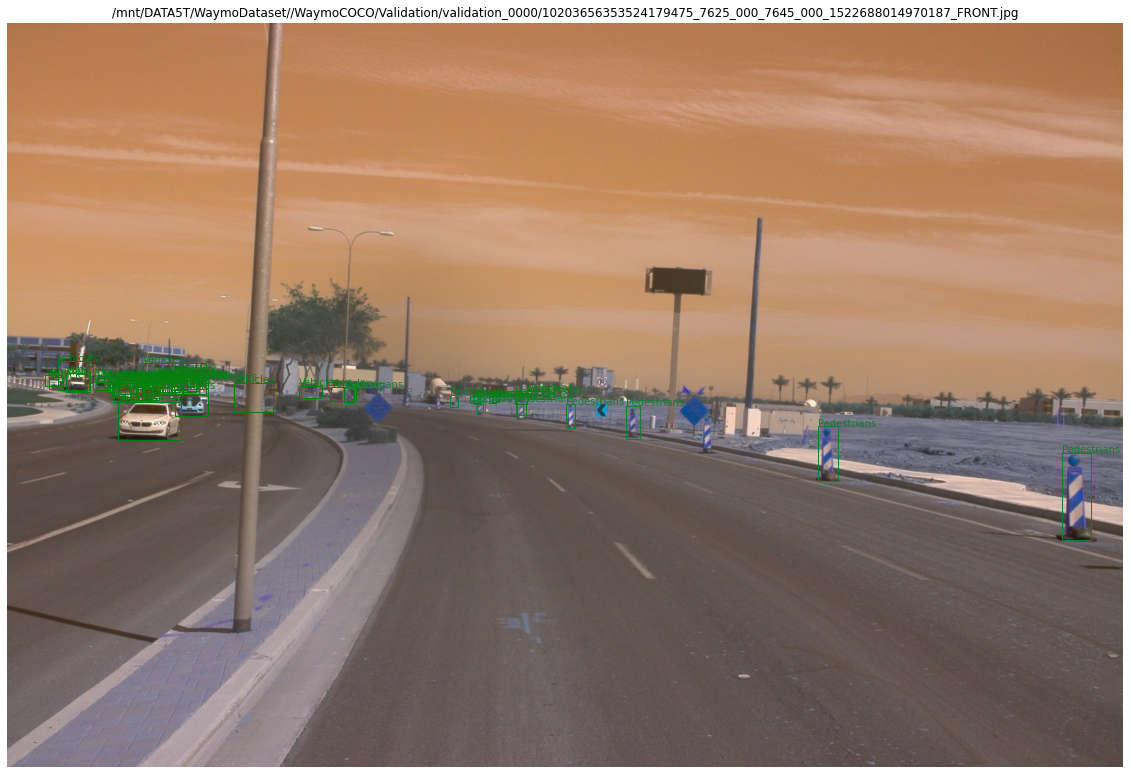

In [53]:
imgpath=os.path.join('/mnt/DATA5T/WaymoDataset//WaymoCOCO/Validation/validation_0000', "10203656353524179475_7625_000_7645_000_1522688014970187_FRONT.jpg")
print(imgpath)
detectoneimage(imgpath, mydetector)

# Waymo TorchVision Evaluation

In [57]:
#ref: https://colab.research.google.com/github/waymo-research/waymo-open-dataset/blob/master/tutorial/tutorial.ipynb#scrollTo=hDQ1DPqwdfNW
!git clone https://github.com/waymo-research/waymo-open-dataset.git waymo-od

["Cloning into 'waymo-od'..."]

In [58]:
!cd waymo-od && git branch -a
!cd waymo-od && git checkout remotes/origin/master

* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/master
  remotes/origin/r1.0
  remotes/origin/r1.0-tf1.15
  remotes/origin/r1.0-tf2.0
  remotes/origin/r1.2
Note: checking out 'remotes/origin/master'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at a476ab4 Add python 3.8 support


In [59]:
!pip3 install waymo-open-dataset-tf-2-1-0==1.2.0

     |████████████████████████████████| 2.8 MB 4.0 MB/s eta 0:00:01
  Using cached tensorflow_gpu-2.1.0-cp37-cp37m-manylinux2010_x86_64.whl (421.8 MB)
Processing /home/kaikai/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp37-none-any.whl
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Using cached scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl (26.1 MB)
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Foun

In [1]:
import tensorflow as tf
#print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.1.0
Keras Version:  2.2.4-tf
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [3]:
from MyDetector import TorchVisionEvaluator
import importlib
importlib.reload(TorchVisionEvaluator)

def parse_detectorargs():
    #args.showfig
    #args.modelname
    #args.modelbasefolder
    #args.modelfilename
    parser = argparse.ArgumentParser()
    parser.add_argument("--modelname", type=str, default="faster_rcnn_X_101_32x8d_FPN_3x")#not used here
    #model=load_previous_object_detection_model(num_classes,'./saved_models_py4/model_18.pth') #./saved_models_mac1/model_27.pth
    parser.add_argument("--modelbasefolder", type=str, default="/home/010796032/Waymo/saved_models_py4")
    parser.add_argument("--modelfilename", type=str, default="model_27.pth")
    parser.add_argument("--showfig", type=str, default="True")
    return parser.parse_args()

#Simulate the args parse in Jupyternotebook
class detectorargs:
    modelname = 'fasterrcnn_resnet50_fpn'#not used here
    modelbasefolder = './ModelOutput'
    modelfilename='waymo_fasterrcnn_resnet50_fpnmodel_27.pth'
    showfig='True'
    FULL_LABEL_CLASSES = [
    'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'
    ]
    datasetpath='/mnt/DATA5T/WaymoDataSet'
    #FULL_LABEL_CLASSES=['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']#['ignored-regions', 'pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle','bus',  'motor', 'others']

#myevaluator=TorchVisionEvaluator.TorchVisionWaymoCOCOEvaluator(detectorargs)

In [8]:
!ls /mnt/DATA5T/WaymoDataset

NewTFRecord	   training_0001.tar  validation_0000.tar  WaymoCOCO.zip
training_0000.tar  Validation0000     WaymoCOCO


In [4]:
from MyDetector import WaymoDataset
import importlib
importlib.reload(WaymoDataset)

print("Loading Waymo validation frames...")
folderlist = ["Validation0000"]
waymovalidationframes=WaymoDataset.loadWaymoValidationFrames('/mnt/DATA5T/WaymoDataset', folderlist)
#mywaymovaldataset = myWaymoTestDataset(PATH, waymovalidationframes, get_transform(train=False))
print("Total validation frames: ", len(waymovalidationframes))

Loading Waymo validation frames...
['/mnt/DATA5T/WaymoDataset/Validation0000/segment-2094681306939952000_2972_300_2992_300_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-662188686397364823_3248_800_3268_800_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-4423389401016162461_4235_900_4255_900_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-11037651371539287009_77_670_97_670_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-16213317953898915772_1597_170_1617_170_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-1105338229944737854_1280_000_1300_000_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-14127943473592757944_2068_000_2088_000_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Validation0000/segment-17612470202990834368_2800_000_2820_000_with_camera_labels.tfrecord', '/mnt/DATA5T/WaymoDataset/Val

In [5]:
myevaluator=TorchVisionEvaluator.TorchVisionWaymoCOCOEvaluator(detectorargs, waymovalidationframes)

Total validation frames:  4954
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no bbox, drop
no 

In [16]:
import numpy
print(numpy.__version__)

1.18.1


In [17]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [6]:
myevaluator.evaluate()

creating index...
index created!


/home/kaikai/anaconda3/envs/Newenv/lib/python3.7/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


Test:  [   0/4795]  eta: 1:04:51  model_time: 0.2201 (0.2201)  evaluator_time: 0.0367 (0.0367)  time: 0.8115  data: 0.5267  max mem: 579
Test:  [ 100/4795]  eta: 0:07:31  model_time: 0.0686 (0.0699)  evaluator_time: 0.0125 (0.0141)  time: 0.0925  data: 0.0033  max mem: 579
Test:  [ 200/4795]  eta: 0:07:06  model_time: 0.0673 (0.0692)  evaluator_time: 0.0093 (0.0144)  time: 0.0884  data: 0.0033  max mem: 579
Test:  [ 300/4795]  eta: 0:06:53  model_time: 0.0687 (0.0689)  evaluator_time: 0.0204 (0.0147)  time: 0.0932  data: 0.0033  max mem: 579
Test:  [ 400/4795]  eta: 0:06:45  model_time: 0.0688 (0.0688)  evaluator_time: 0.0159 (0.0153)  time: 0.0918  data: 0.0033  max mem: 579
Test:  [ 500/4795]  eta: 0:06:34  model_time: 0.0679 (0.0688)  evaluator_time: 0.0070 (0.0153)  time: 0.0897  data: 0.0033  max mem: 579
Test:  [ 600/4795]  eta: 0:06:23  model_time: 0.0680 (0.0687)  evaluator_time: 0.0055 (0.0150)  time: 0.0841  data: 0.0034  max mem: 579
Test:  [ 700/4795]  eta: 0:06:13  model_t

# Tensorflow2 Object Detection

In [17]:
!pwd

/home/kaikai/Documents/MyDetector


In [18]:
import tensorflow as tf
#print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.1.0
Keras Version:  2.2.4-tf
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
